### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

Set the max number of columns displayed so we can expect all the data.

In [3]:
#Display all columns by setting the max columns to None
pd.set_option('display.max_columns', None)
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Inspect  data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#Inpect data
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Inspect shape
data.shape

(12684, 26)

In [7]:
# Look for missing values
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

#### Drop the `car` column since it is empty.

In [8]:
# Drop the "car" column
data = data.drop(columns=['car'])

In [10]:
#Re-inspect data after dropping the "car" column
data.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

#### We will need to fix the `coupon` column data because of inconsistencies in its values format.

In [11]:
#inspect coupon data
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [12]:
#Fix "coupon" column data

#replace anything that has '(' and get the first element. (e.g. Restaurant(<20), Restaurant(20-50))
data['coupon'] = data['coupon'].str.split(pat='(').str[0]

#re-inspect data
data['coupon'].value_counts()

coupon
Restaurant               4278
Coffee House             3996
Carry out & Take away    2393
Bar                      2017
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
#get totals
total_coupons = data['Y'].count()

#calculate proportion
coupon_accepted = data['Y'].value_counts()[1]
coupon_not_accepted = data['Y'].value_counts()[0]
coupon_data = data['Y'].value_counts().reset_index()
coupon_data_proportion = data['Y'].value_counts(normalize=True).reset_index()

print('Total Coupons: ' + str(total_coupons))
print('Coupons Accepted: ' + str(coupon_accepted))
print('Coupons Not Accepted: ' + str(coupon_not_accepted))

print('------------')

print('Proportion: ')
print('Accepted: ' + str(round(coupon_data_proportion['proportion'][0] * 100)) + '%')
print('Not accepted: ' + str(round(coupon_data_proportion['proportion'][1] * 100)) + '%')



Total Coupons: 12684
Coupons Accepted: 7210
Coupons Not Accepted: 5474
------------
Proportion: 
Accepted: 57%
Not accepted: 43%


#### __57%__ accepted the coupon.

#### __43%__ did not accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

## Plot coupon venue type

### Prepare data
1. Extract `coupon` and `Y` columns, then group and sort the data set
2. Convert `Y` coloumn data type to be compatible with Seaborn plotting algorithm
3. Inspect data

In [14]:
# Extract data for coupons accepted per coupon type
acceptance_per_coupon = data[['coupon', 'Y']].value_counts().reset_index(['coupon', 'Y']).sort_values(['coupon', 'Y'])

# I need to do this because Seaborn is using the .startWith() on Y values which doesn't exist on the original type int64
acceptance_per_coupon['Y'] = acceptance_per_coupon['Y'].astype(str)

print(acceptance_per_coupon)
print(acceptance_per_coupon['count'].sum())

                  coupon  Y  count
5                    Bar  0   1190
6                    Bar  1    827
7  Carry out & Take away  0    633
3  Carry out & Take away  1   1760
1           Coffee House  0   2001
2           Coffee House  1   1995
4             Restaurant  0   1650
0             Restaurant  1   2628
12684


#### Plot the data

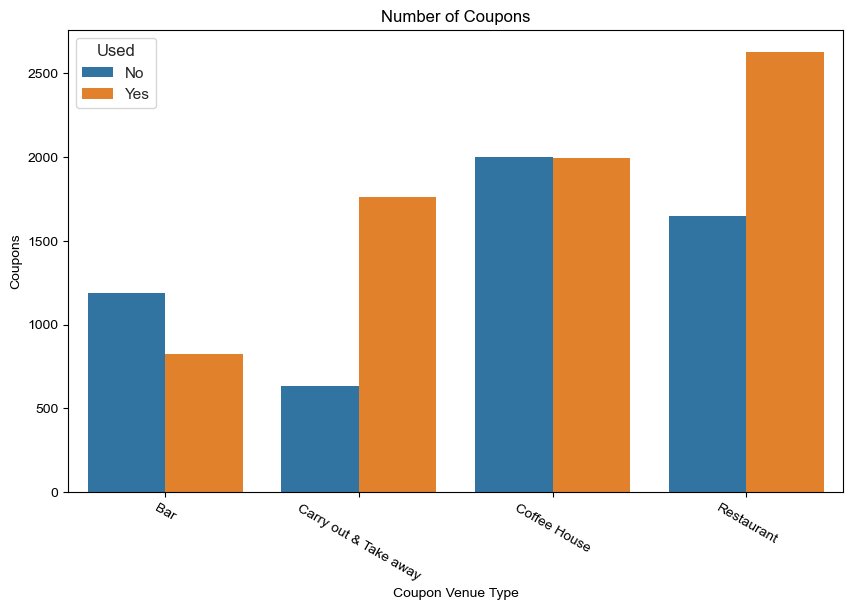

In [15]:
#set plot size
plt.figure(figsize=(10, 6))

#plot using food types
barplot = sns.barplot(data=acceptance_per_coupon, x='coupon', y='count', hue='Y')
barplot.patches

#set text and fromat x labels
sns.set_theme(style='whitegrid')
plt.xlabel('Coupon Venue Type')
plt.ylabel('Coupons')
plt.title('Number of Coupons')
plt.xticks(rotation = -30)

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Used', loc='upper left')
plt.show()

In [18]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


6. Use a histogram to visualize the temperature column.

In [16]:
data['temperature'].value_counts().reset_index()

,temperature,count
0,80,6528
1,55,3840
2,30,2316


<Axes: xlabel='temperature', ylabel='Count'>

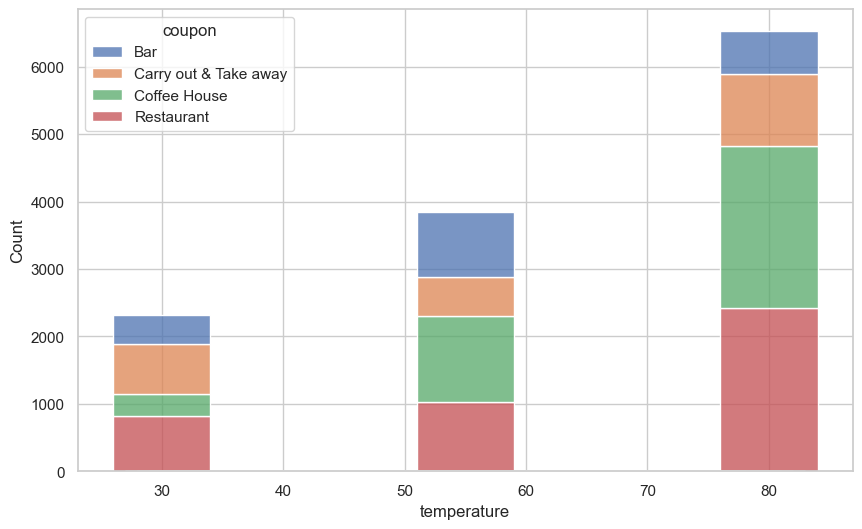

In [21]:
#Create correlation data between temperature and coupon acceptance

# Seaborn is encuntering a warning when plotting so I needed to suppress this
warnings.filterwarnings('ignore', category=FutureWarning, message='use_inf_as_na option is deprecated')

temp_data = data.groupby(['temperature', 'coupon']).size().reset_index(name='count')
temp_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=temp_data, 
              x='temperature', 
              weights='count', 
              hue='coupon', 
              discrete=True, 
              multiple='stack', 
              shrink=8,
              bins=temp_data['temperature'].nunique()
            )


Analysis: The chart above shows that drivers accept more coupons during warmer weather and less during colder weather.

This also means we can assume that they are likely to accept coupons during the summer season.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [280]:
# create the new dataset with just the 'Bar' type coupon
bar_coupons = data[data['coupon'] == 'Bar']
# inspect data
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [288]:
# get proportion values
bar_proportion = bar_coupons['Y'].value_counts(normalize=True).reset_index()

# convert proportion to percentage values
bar_proportion['proportion'] = round(bar_proportion['proportion'] * 100)

bar_proportion

,Y,proportion
0,0,59.0
1,1,41.0


#### Answer for item #2
##### The proportion is `41%` accepted and `59%` not accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [296]:
#investigate data
bar_coupons['Bar'].value_counts().reset_index()

,Bar,count
0,never,830
1,less1,570
2,1~3,397
3,4~8,150
4,gt8,49


Get Bar coupon for those who went 3 or fewer times to a bar

In [410]:
# filter all Bar values never, less1 and 1~3
bar_3orFewer = bar_coupons.query('Bar in ["never", "less1", "1~3"]').reset_index()

# get totals and percentage
print(bar_3orFewer['Y'].value_counts().reset_index())
print(round(bar_3orFewer['Y'].value_counts(normalize=True).reset_index()['proportion'] * 100))

   Y  count
0  0   1131
1  1    666
0    63.0
1    37.0
Name: proportion, dtype: float64


Get Bar coupon for those who went 4 or more times to a bar

In [412]:
# filter all Bar values never, less1 and 1~3
bar_4orMore = bar_coupons.query('Bar in ["4~8", "gt8"]').reset_index()

# get totals and percentage
print(bar_4orMore['Y'].value_counts().reset_index())
print(round(bar_4orMore['Y'].value_counts(normalize=True).reset_index()['proportion'] * 100))

   Y  count
0  1    153
1  0     46
0    77.0
1    23.0
Name: proportion, dtype: float64


#### Answer for item # 3:
##### The proportion of those who went to the bar 4 or more times a month (`77%`) is higher than those who went 3 or fewer times a month (`37%`).

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [318]:
# Investigate data
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


In [360]:
# Investigate data
bar_coupons['Bar'].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [361]:
# Investigate data
bar_coupons['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [364]:
# # Get who went to the bar more than once and and age over 25
bar_1orMore_moreThan25 = bar_coupons.query('age in ["26", "31", "36", "41", "46", "50plus"] and \
                                           Bar in ["1~3", "4~8", "gt8"]').reset_index()
bar_1orMore_moreThan25

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,0,1,1
1,123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,1,0,1
2,127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,1,1,0,1,1
3,156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,1
4,167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,gt8,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,0,1,1
416,12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,0,1,1
417,12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,0,1,1
418,12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,0,1,1


In [370]:
round(bar_1orMore_moreThan25['Y'].value_counts(normalize=True) * 100).reset_index()

,Y,proportion
0,1,70.0
1,0,30.0


In [371]:
# # Get who went to the bar less than once and and age less than 25
bar_fewerThan1_ageLessThan25 = bar_coupons.query('age not in ["26", "31", "36", "41", "46", "50plus"] and \
                                           Bar not in ["1~3", "4~8", "gt8"]').reset_index()
bar_fewerThan1_ageLessThan25
round(bar_fewerThan1_ageLessThan25['Y'].value_counts(normalize=True) * 100).reset_index()

,Y,proportion
0,0,61.0
1,1,39.0


#### Answer for item #4:
##### Yes, there is a difference in acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 (`70%`) to the all others (`39%`).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [374]:
bar_coupons['passanger'].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [383]:
bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [389]:
bar_item4 = bar_coupons.query('age not in ["26", "31", "36", "41", "46", "50plus"] and \
                                passanger != "Kid(s)" and \
                                occupation != "Farming Fishing & Forestry"').reset_index()
# Inspect values
#bar_item4['occupation'].value_counts()
#bar_item4['Y'].value_counts().reset_index()

# Get proportions
round(bar_item4['Y'].value_counts(normalize=True) * 100).reset_index()

,Y,proportion
0,0,50.0
1,1,50.0


#### Answer for item #5:
##### The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is `50%`.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [392]:
bar_coupons['maritalStatus'].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [396]:
# Inspect RestaurantLessThan20 va;ues
bar_coupons['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

In [400]:
# Add a number version for the income column
bar_coupons['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [405]:
# Build the query define in item #6
bar_item6 = bar_coupons.query('(Bar in ["1~3", "4~8", "gt8"] and \
                                passanger != "Kid(s)" and \
                                maritalStatus != "Widowed") \
                              or \
                               (Bar in ["1~3", "4~8", "gt8"] and \
                                age in ["below21", "21", "26"]) \
                              or \
                               (RestaurantLessThan20 in ["4~8", "gt8"] and \
                                income in ["$12500 - $24999"])').reset_index()

round(bar_item6['Y'].value_counts(normalize=True) * 100).reset_index()

,Y,proportion
0,1,68.0
1,0,32.0


#### Answer for item #6:
##### Given the follwing conditions:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 
##### The acceptance rate is `68%`.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Based on my observations on  bar coupons I can report that:
- Drivers in general accepted `41%` of the bar coupons.
- The proportion of those who went to the bar 4 or more times a month (`77%`) is higher than those who went 3 or fewer times a month (`37%`).
- There is a difference in acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 (`70%`) to the all others (`39%`).
- The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is `50%`.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  